In [ ]:
!chmod 600 ~/.passwd-s3fs

In [ ]:
!apt install s3fs

In [ ]:
!mkdir /content/s3
!s3fs um2ii-datasets /content/s3

In [ ]:
import pandas as pd
from fastai.vision.all import *
from sklearn.model_selection import train_test_split
import os
from glob import glob
from sklearn import metrics

CheXpert Race v1 Validation

In [ ]:
test_df = pd.read_csv('/content/VinDr_Full/VinDr_labels.csv')
test_df['Path'] = 'VinDr_Full/' + test_df['Path'].astype(str)

In [ ]:
chexpert_race1_model = load_learner('/content/chexpert_race1.pkl')
chexpert_race1_model.dls.to(device='cuda')
chexpert_race1_model.model.to(device='cuda')
race_test_dl = chexpert_race1_model.dls.test_dl(test_df)
race_preds = chexpert_race1_model.get_preds(dl=race_test_dl, with_decoded=True)

In [ ]:
chexpert_race1_model.dls.vocab

['Non-Hispanic Asian', 'Non-Hispanic Black', 'Non-Hispanic White']

<BarContainer object of 3 artists>

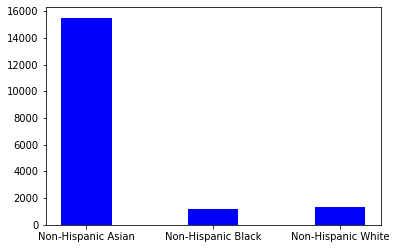

In [ ]:
race_labels = chexpert_race1_model.dls.vocab.o2i.keys()
prediction_counts = [race_preds[2].tolist().count(0), race_preds[2].tolist().count(1), race_preds[2].tolist().count(2)]
plt.bar(race_labels, prediction_counts, color ='blue', width = 0.4)

In [ ]:
test_df.insert(len(test_df.columns), 'Race/Ethnicity_Tensor_Id', race_preds[2].numpy())
test_df.insert(len(test_df.columns), 'Race/Ethnicity_Probability', race_preds[0].numpy().tolist())
print(test_df)
test_df.to_csv('/content/sample_data/chexpert_race1_vindr_test.csv')

                                                  Path  ...                                          Race/Ethnicity_Probability
0      VinDr_Full/000434271f63a053c4128a0ba6352c7f.jpg  ...  [0.9949749708175659, 0.00031662359833717346, 0.004708441440016031]
1      VinDr_Full/00053190460d56c53cc3e57321387478.jpg  ...     [0.7383556962013245, 0.017614953219890594, 0.24402940273284912]
2      VinDr_Full/0005e8e3701dfb1dd93d53e2ff537b6e.jpg  ...      [0.5788838863372803, 0.23258154094219208, 0.18853457272052765]
3      VinDr_Full/0006e0a85696f6bb578e84fafa9a5607.jpg  ...    [0.9222075343132019, 0.044686198234558105, 0.033106278628110886]
4      VinDr_Full/0007d316f756b3fa0baea2ff514ce945.jpg  ...    [0.9705324769020081, 0.0012797968229278922, 0.02818775735795498]
...                                                ...  ...                                                                 ...
17995  VinDr_Full/ff91fb82429a27521bbec8569b041f02.jpg  ...      [0.6036867499351501, 0.2972464263439178